In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt

In [4]:
from ./read import read_obs
from plot import get_plotvars, plot_obs
import xarray as xr
import numpy as np
import pandas as pd
import warnings
import sys
import os
import argparse

def main():
    # Create the parser
    obsparser = argparse.ArgumentParser(description='Process observational data.')

    # Add the arguments
    obsparser.add_argument('directory', metavar='directory', type=str, help='the path to the data directory')

    obsparser.add_argument('obstype', metavar='obstype', type=str, help='the type of observation (e.g., WOD, Cosmic-Ionosphere)')

    obsparser.add_argument('filetype', metavar='filetype', type=str, help='the file type (e.g., nc, hdf)')

    # Execute the parse_args() method
    args = obsparser.parse_args()

    # Read observations based on provided arguments
    try:
        obs_data = read_obs(args.directory, args.obstype, args.filetype)
        print("Successfully read data.")
    except Exception as e:
        print(f"An error occurred: {e}")

    type = args.obstype
    
    plotparser = argparse.ArgumentParser(description='Plot observational data.')

    varoptions = get_plotvars(obs_data, type)
    
    print('Available variables: ' + str(varoptions))

    plotparser.add_argument('var', metavar='var', type=str, help='the variable to plot')

    plotparser.add_argument('savename', metavar='savename', type=str, help='filename of figure')

    # Execute the parse_args() method
    args = obsparser.parse_args()

    # Read observations based on provided arguments
    try:
        plot = plot_obs(obs_data, type, var)
        
        print("Successfully plotted data. Check figures directory for output.")
    except Exception as e:
        print(f"An error occurred: {e}")


if __name__ == "__main__":
    main()

SyntaxError: invalid syntax (4196449299.py, line 1)

In [36]:
wod = xr.open_dataset('/glade/campaign/cisl/dares/Observations/do_not_use_WOD13/CMENS/SEALEVEL_GLO_PHY_L3_REP_OBSERVATIONS_008_045/dataset-duacs-rep-global-alg-phy-l3-v3/2016/dt_global_alg_phy_vfec_l3_20160704_20170209.nc')

In [63]:
wod

<xarray.Dataset>
Dimensions:       (time: 10088)
Coordinates:
  * time          (time) datetime64[ns] 2016-07-04T12:59:13.914080 ... 2016-0...
    longitude     (time) float64 275.7 275.6 275.5 275.3 ... 23.1 22.33 21.56
    latitude      (time) float64 -66.3 -66.18 -66.06 -65.95 ... 81.02 81.06 81.1
Data variables:
    cycle         (time) int16 100 100 100 100 100 100 ... 100 100 100 100 100
    track         (time) int16 ...
    sla_filtered  (time) float32 ...
    adt_filtered  (time) float32 ...
Attributes: (12/43)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Swath
    comment:                         Sea Surface Height measured by altimeter...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-3 sea su...
    time_coverage_duration:          P10H47M1.242929S
    time_coverage_end:               2016-07-04T23:46:15Z
    time_coverage_resolution:        P1S
    time_coverage_start:             2016-07-04T12:59:13Z
    title:                           DT AltiKa Drifting Phase Global Ocean Al...

In [78]:
ion['TEC_cal']

<xarray.DataArray 'TEC_cal' (MSL_alt: 422)>
[422 values with dtype=float32]
Coordinates:
  * MSL_alt  (MSL_alt) float32 1.073 3.884 6.691 9.493 ... 787.2 788.2 789.4
Attributes:
    units:        TECU
    valid_range:  [-1.e+08  1.e+08]
    long_name:    Calibrated occultation TEC below LEO orbit

In [73]:
obs = wod
var = 'sla_filtered'

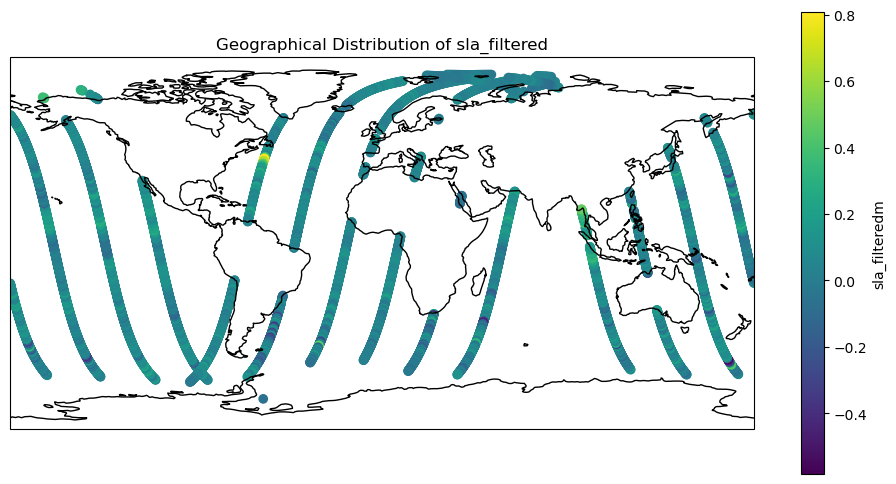

In [74]:
if var == 'sla_filtered' or var == 'adt_filtered':
    unit = 'm'
else:
    unit = ''
        
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())  # PlateCarree is a common projection for global maps
ax.coastlines()
ax.set_global()

# Plotting cycle data
scatter = ax.scatter(obs['longitude'], obs['latitude'], c=obs[var], cmap='viridis', marker='o')

# Adding a color bar
plt.colorbar(scatter, ax=ax, orientation='vertical', label=var + unit)

# Adding titles and labels
plt.title('Geographical Distribution of '  + var)
plt.show()

In [41]:
ion = xr.open_dataset('/glade/campaign/cisl/dares/Observations/ionosphere/raw/cosmic2013/ionPrf/2013.069/ionPrf_C001.2013.069.00.07.G21_2013.3520_nc')
ion

<xarray.Dataset>
Dimensions:    (MSL_alt: 422)
Coordinates:
  * MSL_alt    (MSL_alt) float32 1.073 3.884 6.691 9.493 ... 787.2 788.2 789.4
Data variables:
    GEO_lat    (MSL_alt) float32 ...
    GEO_lon    (MSL_alt) float32 ...
    OCC_azi    (MSL_alt) float32 ...
    TEC_cal    (MSL_alt) float32 ...
    ELEC_dens  (MSL_alt) float32 ...
Attributes: (12/51)
    occ_id:            1
    fiducial_id:       
    reference_sat_id:  0
    occulting_sat_id:  21
    year:              2013
    month:             3
    ...                ...
    fileStamp:         C001.2013.069.00.07.G21
    inverter:          gmrion
    parmsfile:         parms8
    center:            UCAR/CDAAC
    mission:           COSMIC
    creation_time:     03-SEP-14 14:55

In [9]:
test1 = xr.open_dataset('/glade/campaign/cisl/dares/Observations/Cosmic-Ionosphere/rawdata/cosmic2013/ionPrf/2014.074/ionPrf_C002.2014.074.09.07.G07_2013.3520_nc')

In [10]:
test1

<xarray.Dataset>
Dimensions:    (MSL_alt: 347)
Coordinates:
  * MSL_alt    (MSL_alt) float32 110.3 113.4 116.5 119.6 ... 813.9 815.0 816.2
Data variables:
    GEO_lat    (MSL_alt) float32 ...
    GEO_lon    (MSL_alt) float32 ...
    OCC_azi    (MSL_alt) float32 ...
    TEC_cal    (MSL_alt) float32 ...
    ELEC_dens  (MSL_alt) float32 ...
Attributes: (12/51)
    occ_id:            1
    fiducial_id:       
    reference_sat_id:  0
    occulting_sat_id:  7
    year:              2014
    month:             3
    ...                ...
    fileStamp:         C002.2014.074.09.07.G07
    inverter:          gmrion
    parmsfile:         parms8
    center:            UCAR/CDAAC
    mission:           COSMIC
    creation_time:     14-SEP-14 07:11

In [14]:
test2 = xr.open_dataset('/glade/campaign/cisl/dares/Observations/Cosmic-Ionosphere/rawdata/cosmic2013/ionPrf/2014.074/ionPrf_C006.2014.074.21.40.G23_2013.3520_nc')

In [35]:
vars = list(test.keys())
var = vars.remove('GEO_lat').remove('GEO_lon')

AttributeError: 'NoneType' object has no attribute 'remove'

In [59]:
test['ELEC_dens']

<xarray.DataArray 'ELEC_dens' (MSL_alt: 817)>
array([ 844918.   ,  667295.   ,  242048.12 ,  157576.08 ,  138408.55 ,
        149480.25 ,  159422.42 ,  170975.77 ,  184089.1  ,  196799.14 ,
        209213.58 ,  216332.95 ,  100153.04 ,  214597.9  ,  214999.6  ,
        100719.68 ,  215069.7  ,  100398.266,  208954.67 ,  206474.61 ,
         99770.47 ,  205364.66 ,   98874.414,  206143.55 ,  202712.45 ,
         97504.555,  204760.33 ,   97262.94 ,  205135.05 ,  208110.8  ,
         98659.73 ,  209527.3  ,  100711.66 ,  213179.11 ,  218554.03 ,
        103945.33 ,  221618.44 ,  108386.92 ,  223110.56 ,  224068.03 ,
        113219.445,  230446.34 ,  231948.56 ,  117714.836,  235196.5  ,
        124023.88 ,  238155.23 ,  244504.75 ,  129393.51 ,  248621.52 ,
        135946.31 ,  251736.27 ,  256607.33 ,  142581.16 ,  259152.3  ,
        150465.1  ,  264596.12 ,  271752.72 ,  158862.78 ,  277049.3  ,
        167923.95 ,  280839.12 ,  287702.06 ,  177751.7  ,  292744.62 ,
        188168.47 ,  299107.84 ,  307704.28 ,  200099.6  ,  318260.62 ,
        213769.72 ,  328216.5  ,  335576.3  ,  228746.6  ,  348594.88 ,
        245563.66 ,  358868.16 ,  371326.78 ,  264873.12 ,  382297.78 ,
        285445.66 ,  396142.78 ,  410109.8  ,  307196.97 ,  422724.8  ,
        329613.66 ,  441151.53 ,  453808.84 ,  352639.88 ,  473193.62 ,
        374791.75 ,  488759.7  ,  508778.06 ,  396884.9  ,  526066.8  ,
        418503.22 ,  542857.3  ,  565371.6  ,  437879.16 ,  580427.   ,
...
         39298.156,   42223.57 ,   39865.77 ,   44778.95 ,   39652.93 ,
         41376.29 ,   39119.492,   39225.086,   42800.79 ,   42337.754,
         39205.742,   43019.23 ,   38145.617,   42004.883,   42728.465,
         38110.516,   41609.895,   42877.71 ,   38074.01 ,   41826.957,
         37634.09 ,   40459.61 ,   41526.72 ,   37487.21 ,   42510.754,
         37426.91 ,   40388.613,   42232.406,   37022.86 ,   42556.19 ,
         36567.043,   42302.25 ,   40387.09 ,   36986.684,   42150.43 ,
         41011.06 ,   36776.41 ,   41326.188,   36173.668,   41182.01 ,
         42146.004,   35916.965,   41996.938,   36358.31 ,   40729.38 ,
         35643.5  ,   41892.22 ,   35481.69 ,   41914.863,   35631.516,
         40922.75 ,   35231.35 ,   41510.383,   35001.117,   43137.844,
         34924.547,   40559.74 ,   34569.66 ,   42730.785,   34536.945,
         40502.023,   33931.72 ,   42242.016,   34593.848,   40846.574,
         42327.72 ,   33759.23 ,   42068.383,   32337.076,   41257.934,
         33219.35 ,   41108.816,   33821.8  ,   33456.215,   43097.242,
         33844.92 ,   41874.586,   42817.137,   33615.242,   42580.707,
         33608.71 ,   42314.906,   32382.23 ,   40242.1  ,   33266.51 ,
         43892.59 ,   32871.215,   42789.64 ,   32275.354,   42764.695,
         31943.225,   43252.406,   32603.588,   46716.094,   31326.842,
         31801.592,   31539.564], dtype=float32)
Coordinates:
  * MSL_alt  (MSL_alt) float32 86.3 88.36 90.41 92.47 ... 813.9 815.0 816.2
Attributes:
    units:        el/cm3
    valid_range:  [-1.e+08  1.e+08]
    long_name:    Electron density

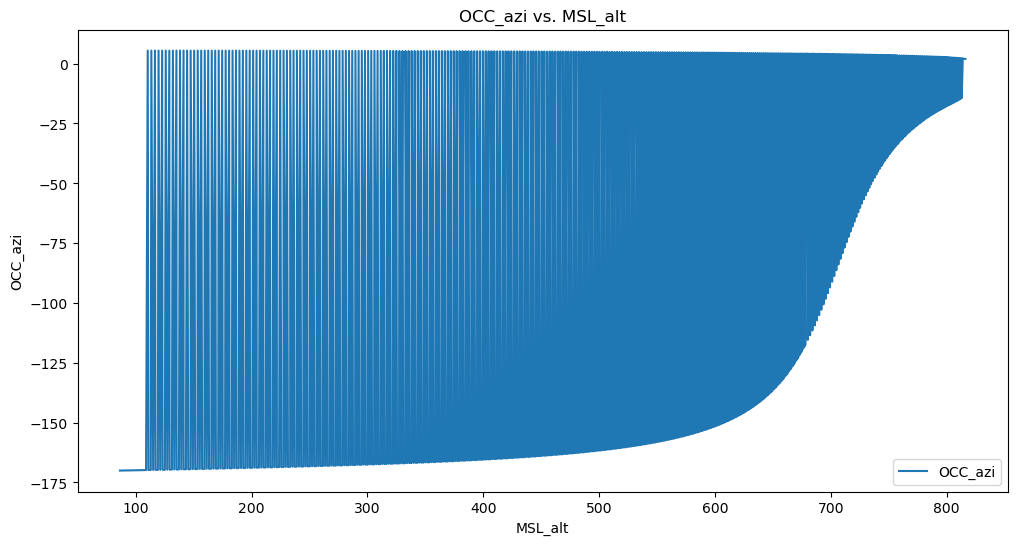

In [55]:
# Extracting the variables
tec_cal = test['OCC_azi']
msl_alt = test['MSL_alt']

# Plotting both on the same axes
plt.figure(figsize=(12, 6))
plt.plot(msl_alt, tec_cal, label='OCC_azi')
plt.xlabel('MSL_alt')
plt.ylabel('OCC_azi')
plt.title('OCC_azi vs. MSL_alt')
plt.legend()
plt.show()

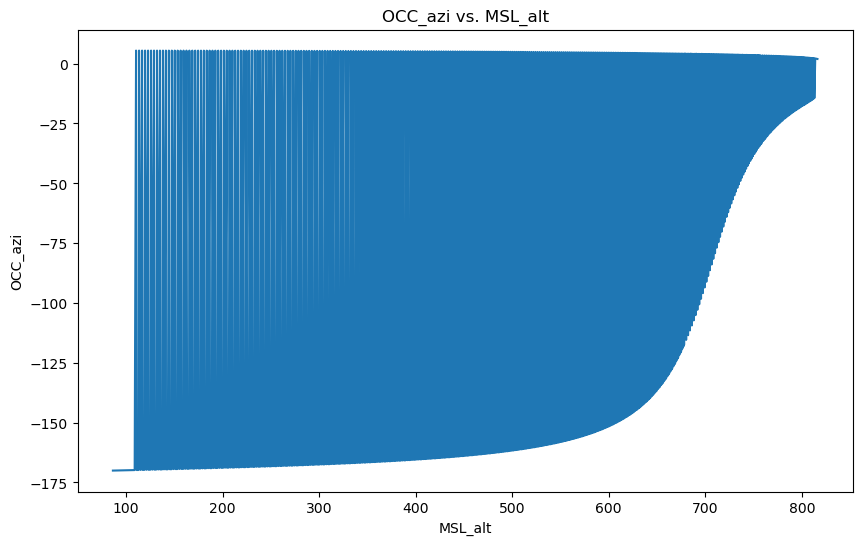

In [50]:
# Extract the OCC_azi variable
occ_azi = test['OCC_azi']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(test['MSL_alt'], occ_azi)
plt.xlabel('MSL_alt')
plt.ylabel('OCC_azi')
plt.title('OCC_azi vs. MSL_alt')
plt.show()

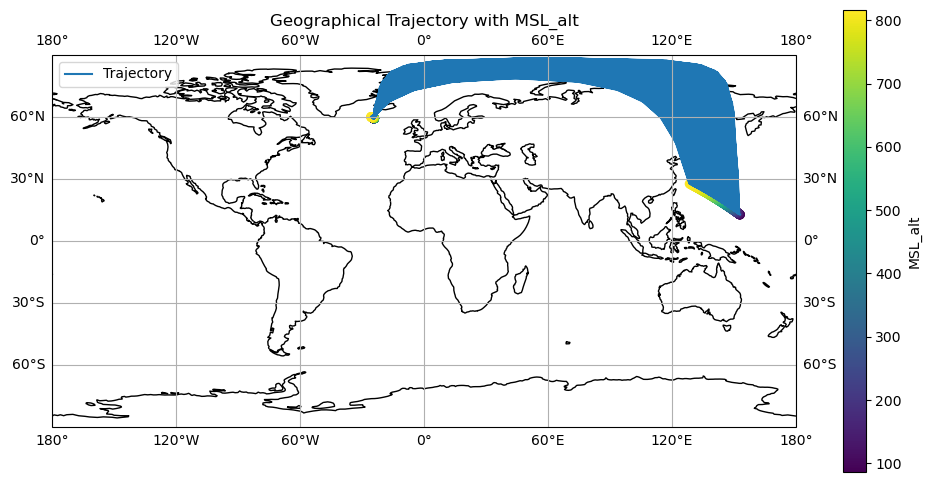

In [23]:
import cartopy.crs as ccrs

# Set up map
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_global()

# Plot trajectory
plt.plot(test['GEO_lon'], test['GEO_lat'], transform=ccrs.Geodetic(), label='Trajectory')
plt.scatter(test['GEO_lon'], test['GEO_lat'], c=test['MSL_alt'], cmap='viridis', transform=ccrs.Geodetic())

# Adding color bar
plt.colorbar(label='MSL_alt', orientation='vertical')

# Add gridlines, title, and legend
ax.gridlines(draw_labels=True)
plt.title('Geographical Trajectory with MSL_alt')
plt.legend()

plt.show()

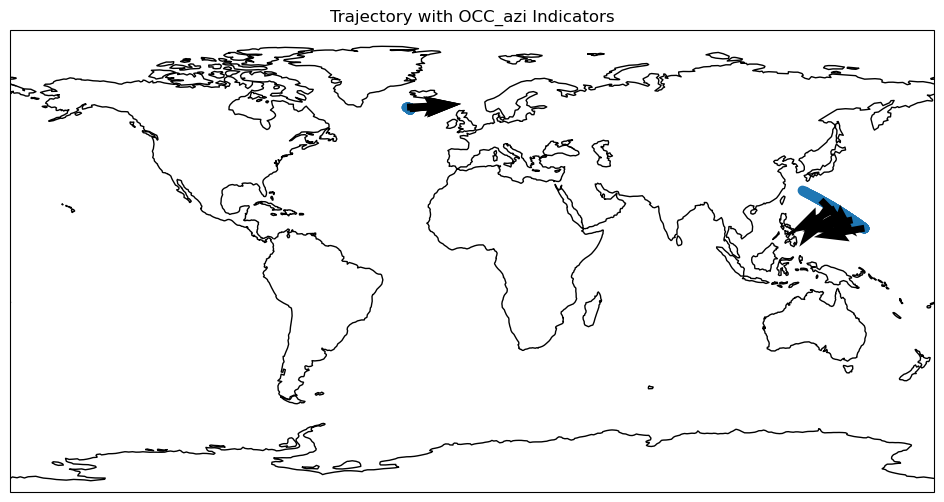

In [31]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
# Set up map
# Set up map
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_global()

# Plot trajectory
plt.scatter(test['GEO_lon'], test['GEO_lat'], transform=ccrs.PlateCarree())

# Add arrows for azimuth
for i in range(0, len(test['MSL_alt']), 100):  # Adjust the step for performance
    lon, lat = test['GEO_lon'].isel(MSL_alt=i), test['GEO_lat'].isel(MSL_alt=i)
    u = np.cos(test['OCC_azi'].isel(MSL_alt=i) * np.pi / 180)  # Convert azimuth to radians
    v = np.sin(test['OCC_azi'].isel(MSL_alt=i) * np.pi / 180)
    ax.quiver(lon, lat, u, v, transform=ccrs.PlateCarree())

plt.title('Trajectory with OCC_azi Indicators')
plt.show()

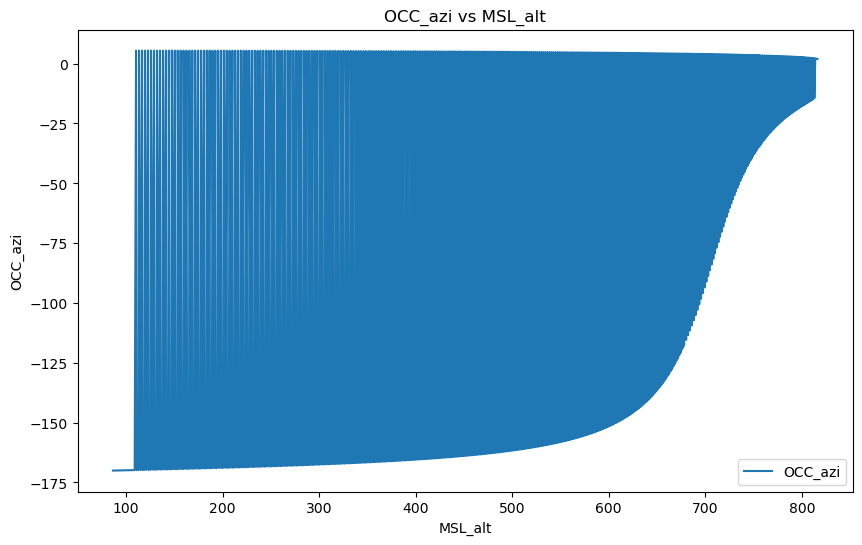

In [27]:
# Line plot for OCC_azi
plt.figure(figsize=(10, 6))
plt.plot(test['MSL_alt'], test['OCC_azi'], label='OCC_azi')
plt.xlabel('MSL_alt')
plt.ylabel('OCC_azi')
plt.title('OCC_azi vs MSL_alt')
plt.legend()
plt.show()


In [ ]:
mean_temp = test['Temp'].mean(dim='OL_vec').compute()

In [3]:
test['Lat'][:]

<xarray.DataArray 'Lat' (OL_vec: 2720569, MSL_alt: 1324619)>
dask.array<concatenate, shape=(2720569, 1324619), dtype=float32, chunksize=(9649, 1324619), chunktype=numpy.ndarray>
Coordinates:
  * MSL_alt  (MSL_alt) float32 -0.05155 -0.02794 -0.004031 ... 60.0 60.0 60.0
Dimensions without coordinates: OL_vec
Attributes:
    units:        deg
    valid_range:  [-90.  90.]
    long_name:    Latitude of perigee point

In [11]:
test['Impact_height'][0,0]

<xarray.DataArray 'Impact_height' ()>
dask.array<getitem, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    MSL_alt  float32 -0.05155
Attributes:
    units:        km
    valid_range:  [  0. 999.]
    long_name:    Impact height

MemoryError: Unable to allocate 13.1 TiB for an array with shape (2720569, 1324619) and data type float32

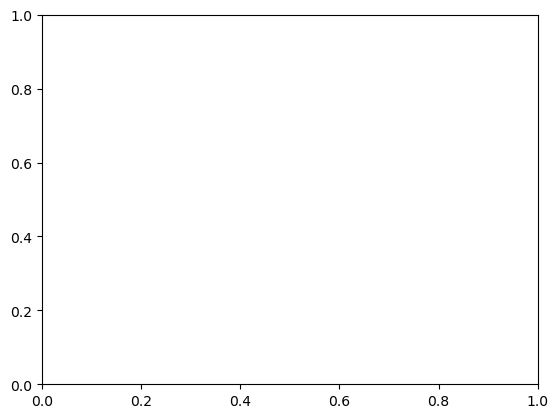

In [10]:
plt.contourf(test['Lat'][:], test['Lon'][:], test['Impact_height'][0])

In [23]:
test1 = xr.open_dataset('/glade/campaign/cisl/dares/Observations/GPS/rawdata/201001/cosmic2013_C1/atmPrf/2010.001/atmPrf_C001.2010.001.00.00.G20_2013.3520.nc')
test1

<xarray.Dataset>
Dimensions:        (MSL_alt: 2871, OL_par: 20, OL_vec: 5849)
Coordinates:
  * MSL_alt        (MSL_alt) float32 60.0 59.98 59.96 ... 1.006 0.9839 0.9565
  * OL_par         (OL_par) float64 nan nan nan nan nan ... nan nan nan nan nan
Dimensions without coordinates: OL_vec
Data variables: (12/16)
    Lat            (MSL_alt) float32 ...
    Lon            (MSL_alt) float32 ...
    Ref            (MSL_alt) float32 ...
    Azim           (MSL_alt) float32 ...
    Pres           (MSL_alt) float32 ...
    Temp           (MSL_alt) float32 ...
    ...             ...
    Bend_ang_conf  (MSL_alt) float64 ...
    OL_ipar        (OL_par) float64 ...
    OL_vec1        (OL_vec) float64 ...
    OL_vec2        (OL_vec) float64 ...
    OL_vec3        (OL_vec) float64 ...
    OL_vec4        (OL_vec) float64 ...
Attributes: (12/80)
    occ_id:            1
    fiducial_id:       
    reference_sat_id:  18
    occulting_sat_id:  20
    year:              2010
    month:             1
    ...                ...
    fileStamp:         C001.2010.001.00.00.G20
    inverter:          newroam
    parmsfile:         parms1
    center:            UCAR/CDAAC
    bad:               0
    errstr:

In [24]:
test2 = xr.open_dataset('/glade/campaign/cisl/dares/Observations/GPS/rawdata/201001/cosmic2013_C1/atmPrf/2010.001/atmPrf_C001.2010.001.23.04.G02_2013.3520.nc')
test2 

<xarray.Dataset>
Dimensions:        (MSL_alt: 2889, OL_par: 20, OL_vec: 5549)
Coordinates:
  * MSL_alt        (MSL_alt) float32 59.99 59.97 59.95 ... 0.3942 0.3656 0.3367
  * OL_par         (OL_par) float64 nan nan nan nan nan ... nan nan nan nan nan
Dimensions without coordinates: OL_vec
Data variables: (12/16)
    Lat            (MSL_alt) float32 ...
    Lon            (MSL_alt) float32 ...
    Ref            (MSL_alt) float32 ...
    Azim           (MSL_alt) float32 ...
    Pres           (MSL_alt) float32 ...
    Temp           (MSL_alt) float32 ...
    ...             ...
    Bend_ang_conf  (MSL_alt) float64 ...
    OL_ipar        (OL_par) float64 ...
    OL_vec1        (OL_vec) float64 ...
    OL_vec2        (OL_vec) float64 ...
    OL_vec3        (OL_vec) float64 ...
    OL_vec4        (OL_vec) float64 ...
Attributes: (12/80)
    occ_id:            1
    fiducial_id:       
    reference_sat_id:  16
    occulting_sat_id:  2
    year:              2010
    month:             1
    ...                ...
    fileStamp:         C001.2010.001.23.04.G02
    inverter:          newroam
    parmsfile:         parms1
    center:            UCAR/CDAAC
    bad:               0
    errstr:

In [20]:
test = xr.open_mfdataset('/glade/campaign/cisl/dares/Observations/GPS/rawdata/201001/cosmic2013_C1/atmPrf/2010.001/*.nc', combine='nested', concat_dim='OL_vec')

In [9]:
len(os.listdir('/glade/campaign/cisl/dares/Observations/ionosphere/raw/cosmic2013/ionPrf/2013.069/'))

879

In [18]:
test = test.drop_dims('OL_par')

In [ ]:
obs = xr.open_mfdataset('/glade/campaign/cisl/dares/Observations/ionosphere/raw/cosmic2013/ionPrf/2013.078/*_nc',combine='nested',compat='override')

In [15]:
obs

<xarray.Dataset>
Dimensions:    (MSL_alt: 385804)
Coordinates:
  * MSL_alt    (MSL_alt) float32 9.193e-05 0.0002035 0.006535 ... 850.3 851.0
Data variables:
    GEO_lat    (MSL_alt) float32 dask.array<chunksize=(385804,), meta=np.ndarray>
    GEO_lon    (MSL_alt) float32 dask.array<chunksize=(385804,), meta=np.ndarray>
    OCC_azi    (MSL_alt) float32 dask.array<chunksize=(385804,), meta=np.ndarray>
    TEC_cal    (MSL_alt) float32 dask.array<chunksize=(385804,), meta=np.ndarray>
    ELEC_dens  (MSL_alt) float32 dask.array<chunksize=(385804,), meta=np.ndarray>
Attributes: (12/51)
    occ_id:            1
    fiducial_id:       
    reference_sat_id:  0
    occulting_sat_id:  21
    year:              2013
    month:             3
    ...                ...
    fileStamp:         C001.2013.069.00.07.G21
    inverter:          gmrion
    parmsfile:         parms8
    center:            UCAR/CDAAC
    mission:           COSMIC
    creation_time:     03-SEP-14 14:55